#Reducción de las dimensiones de Inclusión Financiera con PCA mix

##Código general

En el presente apartado se expone el código utilizado para cada una de las dimensiones descritas dentro del artículo.

In [ ]:
install.packages("PCAmixdata")
install.packages("psych") # Add this line to install the psych package
install.packages("sna") # Add this line to install the sna package
install.packages("qgraph") # Add this line to install the qgraph package
install.packages("EGAnet") # Add this line to install the EGAnet package
install.packages("readxl")
install.packages("dplyr")

In [ ]:
t_modulo<-read_excel("C:/Users/ximen/OneDrive/Escritorio/Pruebas PCA/COMPLETO/AF_COMPLETO_PCA.xlsx")
t_modulo<-data.frame(t_modulo)

###########Número de columnas en el archivo#################
n_var=ncol(t_modulo)
############################################################
head(t_modulo)

#Se convierten todas las variables a categóricas
t_modulo <- t_modulo %>%
  mutate_at(vars(1:n_var,), as.factor)
head(t_modulo)

#Asegurarse de convertir las columnas numéricas

t_modulo$EDAD <- as.integer(t_modulo$EDAD)
t_modulo$INGRESO <- as.integer(t_modulo$INGRESO)
t_modulo$FRECUENCIA_USO_CTA_DEBITO <- as.integer(t_modulo$FRECUENCIA_USO_CTA_DEBITO)

head(t_modulo)

dtsep <- splitmix(t_modulo)
print(dtsep$col.quant)
print(dtsep$col.qual)

res.pcamix <- PCAmix(X.quanti = dtsep$X.quanti,
                      X.quali=dtsep$X.quali,
                      rename.level=TRUE,
                      ndim=75,
                      graph=FALSE,
                      )

res.pcamix$eig
res.pcamix$eig[,1]
plot(res.pcamix$eig[,1], type="b", pch=20, col="blue")
abline(h=1)

res.pcamix$eig


n_dim_significativas=0
for (i in res.pcamix$eig[,1] ){
  if (i>1){
    n_dim_significativas=n_dim_significativas+1
  }

}

print(paste("Dimensiones finales:",n_dim_significativas))

################################################################################################
n_dim_significativas=15
################################################################################################

ag<-res.pcamix$sqload[,1:n_dim_significativas]
ag<-data.frame(ag)
head(ag)
ag
ag$dim<-rep(0,n_var)

for(i in 1:n_var){
  ag$dim[i]<-which.max(ag[i,-1*(n_dim_significativas+1)])
}

head(ag)
ag

ag$variables <- rownames(ag)
head(ag)

ag$cor.max <- rep(0,n_var)
for(i in 1:n_var){


    ag$cor.max[i] <- max(ag[i,-c(n_dim_significativas+1,n_dim_significativas+2)])
}

ag


ggplot(ag,aes(x=reorder(variables,-dim),
              y=cor.max, fill=as.factor(dim) ))+
  geom_bar(stat ='identity') +
  coord_flip()

################################################################################################

################################################################################################

#Rota las componentes
rot<-PCArot(res.pcamix,n_dim_significativas)

ag<-rot$sqload[,1:n_dim_significativas]
ag<-data.frame(ag)
head(ag)
ag
ag$dim<-rep(0,n_var)

for(i in 1:n_var){
  ag$dim[i]<-which.max(ag[i,-1*(n_dim_significativas+1)])
}
head(ag)
ag

ag$variables <- rownames(ag)
head(ag)

ag$cor.max <- rep(0,n_var)
for(i in 1:n_var){
    ag$cor.max[i] <- max(ag[i,-c(n_dim_significativas+1,n_dim_significativas+2)])
}

ag


ggplot(ag,aes(x=reorder(variables,-dim),
              y=cor.max, fill=as.factor(dim) ))+
  geom_bar(stat ='identity') +
  coord_flip()

##Dimensiones

###Ahorro Formal

Descripción de las dimensiones:
* Dimensión 1: situación de tenencia de cuenta de nómina
* DImensión 2: situación y destino de ahorro
* Dimensión 3: comparación de cuentas de ahorro
* DImensión 4: conocimiento de cuenta de nómina
* Dimensión 5: situación de cuenta de apoyo por el gobierno
* DImensión 6: situación exusuarios
* Dimensión 7: ciclo de vida
* DImensión 8: razon de preferencia por el efectivo
* Dimensión 9: situación de cuenta de pensión
* DImensión 10: situación de cuenta de plazo
* Dimensión 11: cuenta de internet
* DImensión 12: cuenta de pensión
* Dimensión 13: tenencia otro tipo de cuenta
* DImensión 14: posición laboral y sexo
* Dimensión 15: geografía

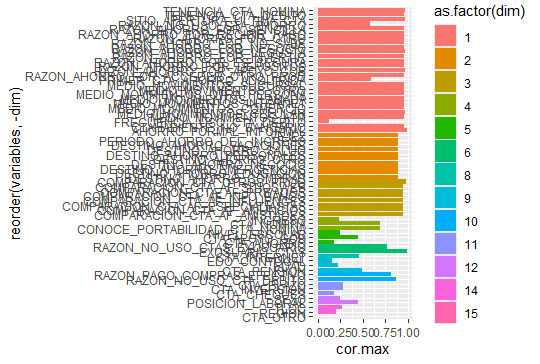

###Afore

Descripción de las dimensiones:
* Dimensión 1: situación de AFORE
* DImensión 2: solvencia de gastos en la vejez
* Dimensión 3: caracteríditcas demograficas
* DImensión 4: situación económica
* Dimensión 5: geografía


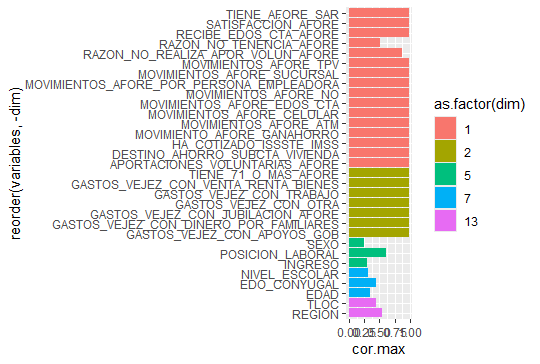

###Capacidad financiera


Descripción de las dimensiones:
* Dimensión 1: Educación
* DImensión 2: estado conyugal y geografía
* Dimensión 3: caracteríditicas sociodemográficas

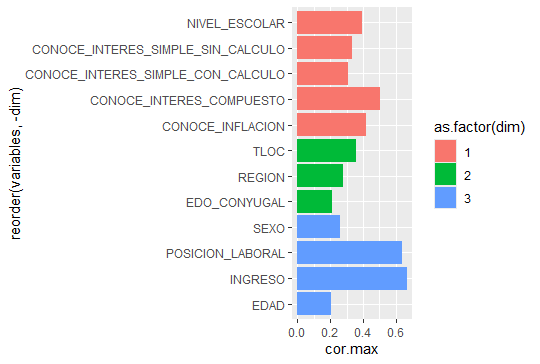

###Crédito Formal

Descripción de las dimensiones:
* Dimensión 1: situación de tarjeta departamental y bancaria
* DImensión 2: rechazo de crédito y razón
* Dimensión 3: comparación entre instituciones
* DImensión 4: credito de vivienda
* Dimensión 6: situación crédito de nomina y personal
* DImensión 8: situación crédito grupal
* Dimensión 9: situación otro tipo de crédito
* DImensión 10: situación crédito por internet
* Dimensión 11: situación de atraso de trarjeta bancaria
* DImensión 12: atrasos crédito nómina
* Dimensión 13: caracterísiticas sociodemográficas
* Dimensión 14: situación conyugal
* DImensión 15: atrasos de crédito automotriz


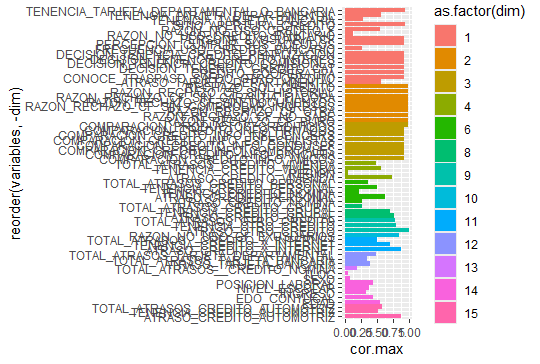

###Confianza al sector financiero

Descripción de las dimensiones:
* Dimensión 1: tipo de problema y razon por la que no presenta quejas
* DImensión 2: situación de percepción de información financiera
* Dimensión 3: consulta datos antes de contratar productos financieros
* DImensión 4: situación de problemas financieros según caracgterísiticas sociodemográficas
* Dimensión 5: situación de cuenta según ciclo de vida


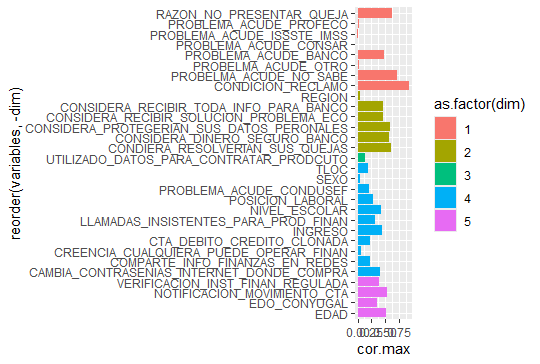

###Demografía

Descripción de las dimensiones:
* Dimensión 1: caracterpisiticas socioeconómicas
* Dimensión 3: programa social y ciclo de vida
* DImensión 4: etnia y geografía
* Dimensión 5: nivel escolar
* DImensión 6: residencia


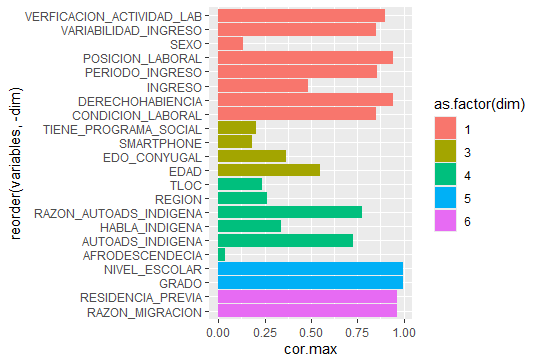

###Pagos

Descripción de las dimensiones:
* Dimensión 1: tranferencias
* DImensión 2: cpagos en supermecado
* Dimensión 3: pagos de transporte público
* DImensión 4: pagos de servicios públicos
* Dimensión 5: pagos en el mercado
* DImensión 6: Dimo y CODI
* Dimensión 7: pagos por celular
* Dimensión 9: remesas
* DImensión 10: ciclo de vida
* DImensión 12: situación laboral
* Dimensión 13: geografía y diversificación de pagos
* DImensión 14: cripyomonedas

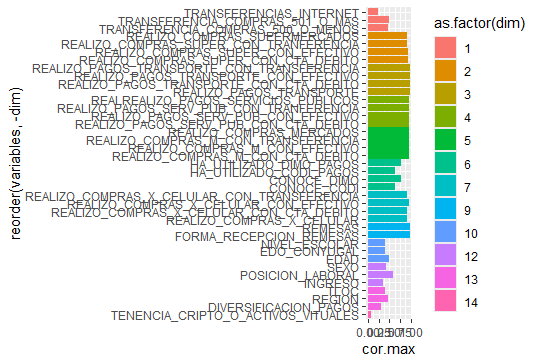

###Tenencia de bienes

Descripción de las dimensiones:
* Dimensión 1: vivienda
* DImensión 2: auto
* Dimensión 3: tierra
* DImensión 4: estado conyugal y toma de decisiones
* DImensión 6: características sociales
* Dimensión 7: geografía y nivel escolar


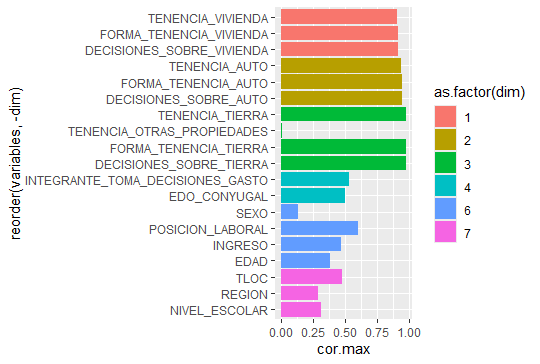

###Protección financiera

Descripción de las dimensiones:
* Dimensión 1: protección de ahorro por institución
* DImensión 2: caracterísiticas sociales
* DImensión 4: geografía
* Dimensión 5: caracterísiticas económicas


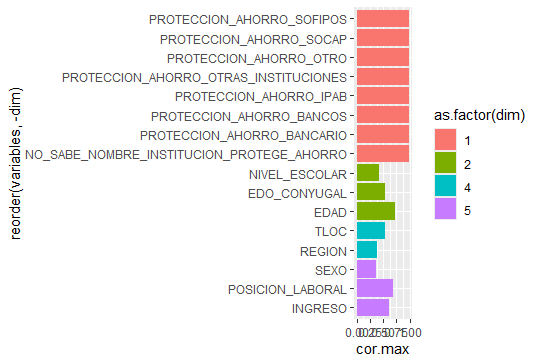

###Seguros

Descripción de las dimensiones:
* Dimensión 1: tenencia y tipo de seguro
* DImensión 2: comparación de intituciones para adquirir seguro
* Dimensión 3: satisfacción seguro contra accidentes
* DImensión 4: conocimiento del monto de seguro
* Dimensión 5: situación otro tipo de seguro
* DImensión 6: situación seguro para casa
* Dimensión 7: situación exusuario de seguro
* DImensión 8: conocimiento de deducibles
* Dimensión 9: situación seguro de gastos médicos mayores
* DImensión 10: confianza seguro de auto
* Dimensión 11: caracterísiticas sociodemográficas


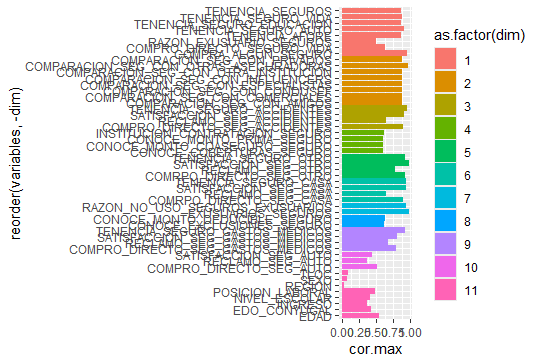

###Sobregasto

Descripción de las dimensiones:
* Dimensión 1: situación de sobregasto
* DImensión 2: control de gastos
* Dimensión 3: situación de ciclo de vida
* Dimensión 5: situación laboral
* Dimensión 7: nivel escolar
* DImensión 8: geografía

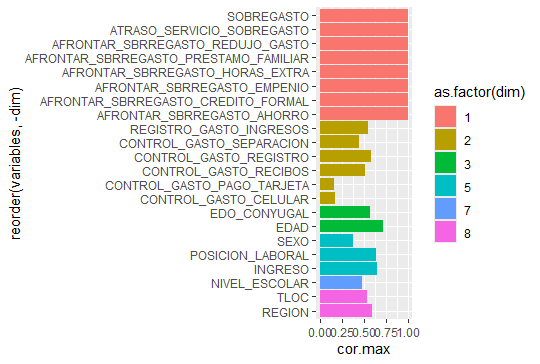

###Uso

Descripción de las dimensiones:
* Dimensión 1: situación de uso
* DImensión 2: ciclo de vida

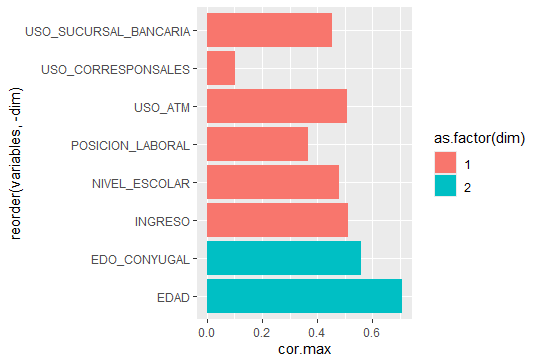

###Vulnerabilidad Financiera

Descripción de las dimensiones:
* Dimensión 1: de acuerdo o desacuerdo con la frase
* DImensión 2: situación laboral y sexo
* DImensión 4: vulnerabilidad financiera
* DImensión 6: geografía
* Dimensión 7: no se preocupa por el futuro
* Dimensión 9: situación de metas económicas
* DImensión 10: ciclo de vida
* Dimensión 11: tipo de oportunidad para obtener casa
* Dimensión 13: conocimiento de conceptos financieros básicos
* DImensión 14: nivel escolar y situación de curso financiero

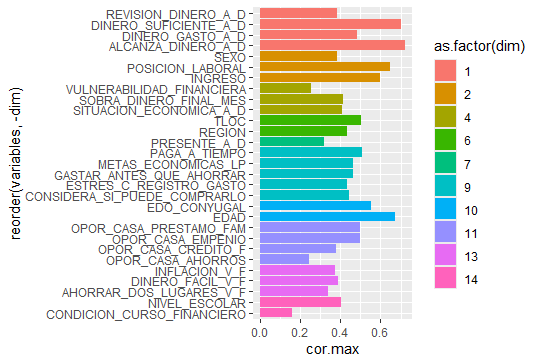